                             open    high   close     low  hour_return  \
date                                                                     
2021-10-22 12:00:00+07:00  199.30  199.80  198.50  197.90          NaN   
2021-10-22 11:00:00+07:00  200.60  200.60  199.40  199.10     0.453401   
2021-10-22 10:00:00+07:00  199.20  201.50  200.60  199.10     0.601805   
2021-10-22 09:00:00+07:00  198.50  199.80  199.10  198.20    -0.747757   
2021-10-22 08:00:00+07:00  200.20  201.40  198.40  198.20    -0.351582   
...                           ...     ...     ...     ...          ...   
2021-08-23 15:00:00+07:00  187.87  189.55  189.20  187.50    -0.431534   
2021-08-23 14:00:00+07:00  187.70  188.24  187.84  186.35    -0.718816   
2021-08-23 13:00:00+07:00  188.81  189.27  187.67  187.41    -0.090503   
2021-08-23 12:00:00+07:00  189.28  189.83  188.83  188.34     0.618106   
2021-08-23 11:00:00+07:00  188.69  189.67  189.27  188.36     0.233014   

                                  day

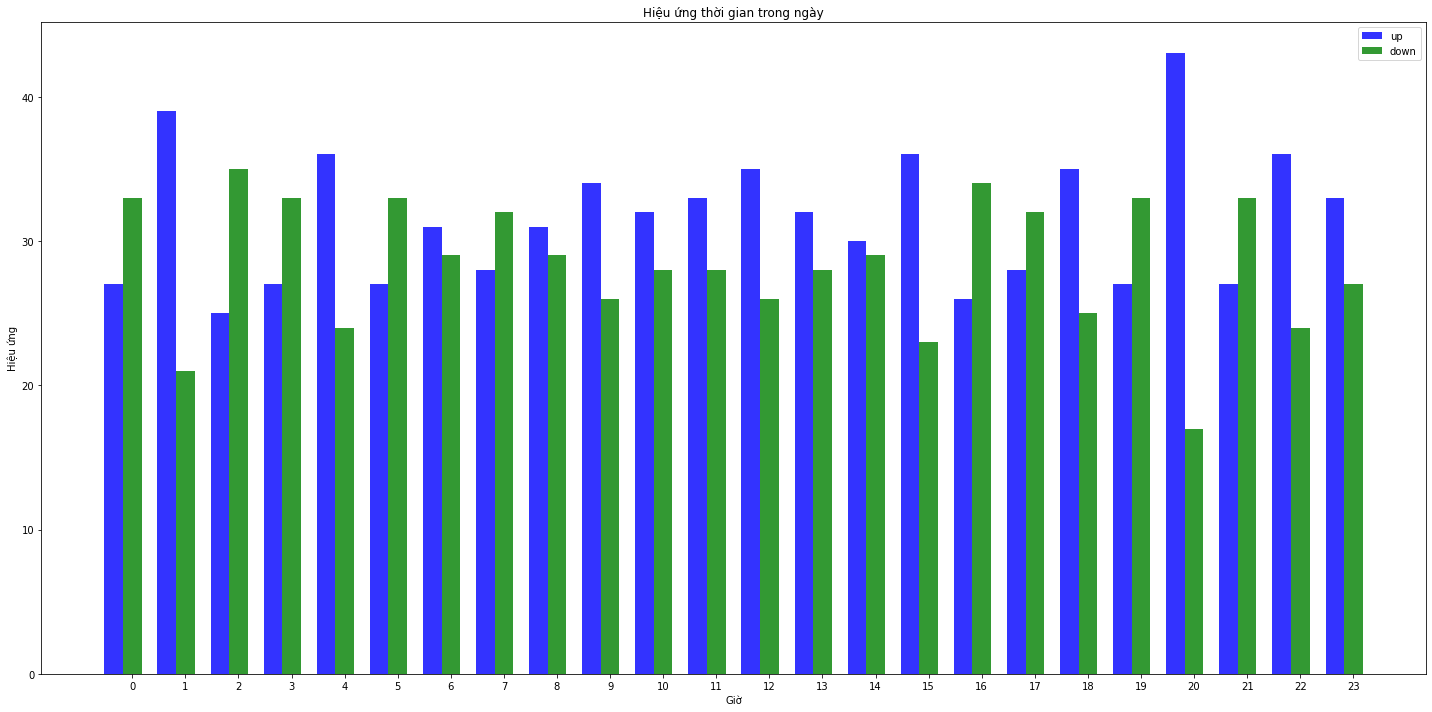

In [40]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*60, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
data_prices['hour_return'] = data_prices['close'].pct_change() * 100
# data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)

# data_prices = data_prices[data_prices['hour'] == 10]

# number_up = len(data_prices[data_prices['type'] == 'up'])
# number_down = len(data_prices[data_prices['type'] == 'down'])

# print(number_up)
# print(number_down)

print(data_prices)

bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()

for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]
    print(f"Giờ {i}")
    print("________________________________")
    print(data_prices_x['hour_return'].describe())

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='g', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()






In [43]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


,open,high,close,low,hour_return,day,hour,type
date,,,,,,,,
2021-09-13 20:00:00+07:00,174.0,240.0,217.4,173.1,21.929333,2021-09-13,20,up


In [12]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



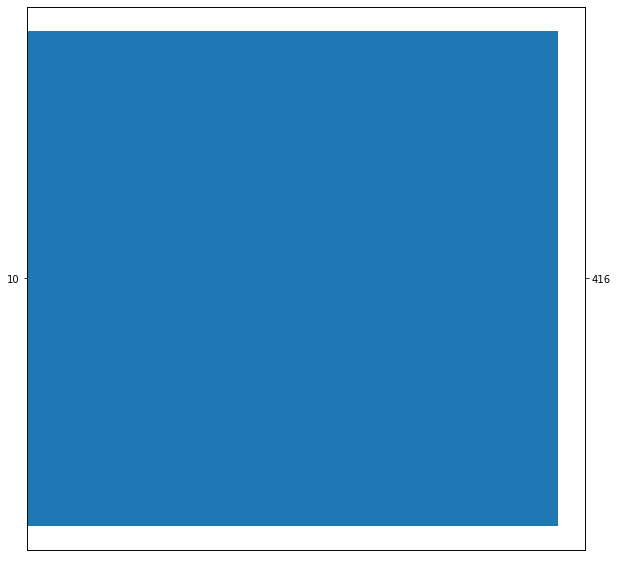

In [13]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()
